In [43]:
import torch
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [44]:
output_dirs = {
    #     "midas_hkrm_random": (
    #         "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output_midas_hkrm/state_270000.tar",
    #         "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/eval_midas_hkrm_v1_test_set/",
    #     ),
    #     "midas_hkrm_v2": (
    #         "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output_midas_hkrm_v2/state_79999.tar",
    #         "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/eval_midas_hkrm_v2_test_set/",
    #     ),
    #     "midas_hkrm_v3": (
    #         "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output_midas_hkrm_v3/state_69999.tar",
    #         "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/eval_midas_hkrm_v3_test_set/",
    #     ),
    "midas_hkrm_v4": (
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output_midas_hkrm_v4/state_299999.tar",
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/eval_midas_hkrm_v4_test_set/",
    ),
    "midas_hkrm_baseline": (
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output_midas_obj_baseline/state_299999.tar",
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/eval_midas_hkrm_baseline_test_set/",
    ),
}

<IPython.core.display.Javascript object>

## Train losses

In [51]:
train_losses = dict()
for k, v in output_dirs.items():
    last_state, _ = v
    train_losses[k] = torch.load(last_state)["train_losses"]

<IPython.core.display.Javascript object>

In [40]:
t = np.array(list(train_losses["midas_hkrm_v4"].values()))

# sum_vec = np.cumsum(t / 6)

smoothed_t = gaussian_filter1d(t / 6, 1000)  # (sum_vec[100:] - sum_vec[:-100]) / 100

train_losses["midas_hkrm_v4"] = smoothed_t

<IPython.core.display.Javascript object>

In [41]:
t = np.array(list(train_losses["midas_hkrm_baseline"].values()))

# sum_vec = np.cumsum(t / 6)

smoothed_t = gaussian_filter1d(t / 6, 1000)  # (sum_vec[100:] - sum_vec[:-100]) / 100

train_losses["midas_hkrm_baseline"] = smoothed_t

<IPython.core.display.Javascript object>

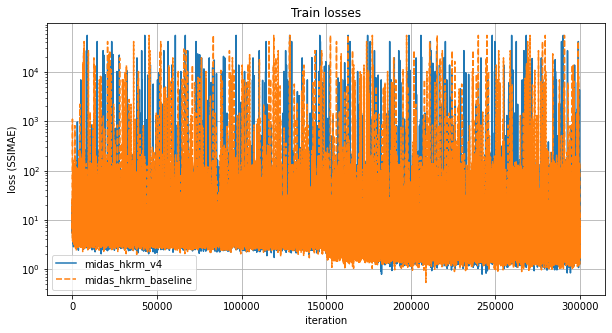

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(10, 5))
plt.grid(True)
# fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
# axs[0].set_yscale("log")
sns.lineplot(data=train_losses)
plt.title("Train losses")
plt.xlabel("iteration")
plt.ylabel("loss (SSIMAE)")
# sns.lineplot(data=test_losses, ax=axs[1])

plt.yscale("log")
plt.savefig("train_losses.jpg")

<AxesSubplot:title={'center':'Train losses for 3 variants of the model'}, xlabel='iteration / 10000', ylabel='loss (SSIMAE)'>

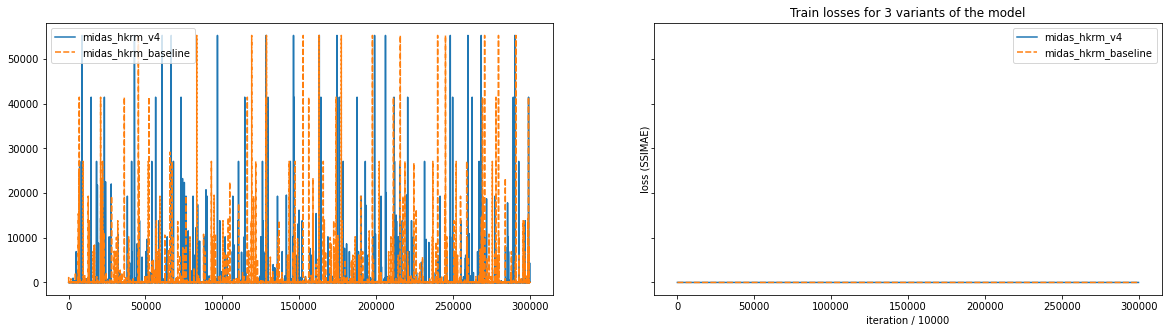

<IPython.core.display.Javascript object>

In [55]:
# plt.figure(figsize=(10, 5))
# plt.grid(True)
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
# axs[0].set_yscale("log")
sns.lineplot(data=train_losses, ax=axs[0])
plt.title("Train losses for 3 variants of the model")
plt.xlabel("iteration / 10000")
plt.ylabel("loss (SSIMAE)")
sns.lineplot(data=test_losses, ax=axs[1])

# plt.yscale("log")
# plt.savefig("train_losses.jpg")

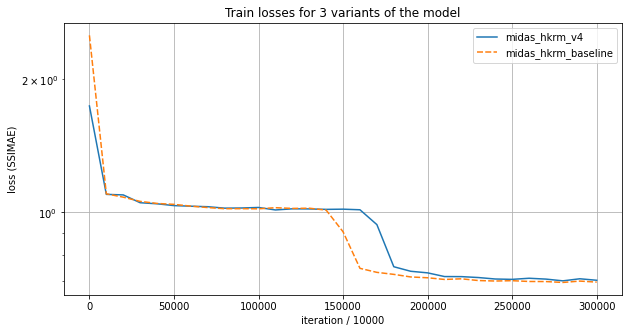

<IPython.core.display.Javascript object>

In [102]:
plt.figure(figsize=(10, 5))
plt.grid(True)
sns.lineplot(data=test_losses)
plt.title("Train losses for 3 variants of the model")
plt.xlabel("iteration / 10000")
plt.ylabel("loss (SSIMAE)")

plt.yscale("log")
plt.savefig("test_losses.jpg")

## Test losses

In [45]:
import os

<IPython.core.display.Javascript object>

In [46]:
import re
from collections import OrderedDict
import pickle

<IPython.core.display.Javascript object>

In [47]:
iter_re = re.compile("state_(?P<iteration>[0-9]*).pickle")

<IPython.core.display.Javascript object>

In [48]:
test_losses = dict()
for k, v in output_dirs.items():
    _, folder = v
    state_files = os.listdir(folder)
    losses = []
    for state_file in state_files:
        iteration = int(iter_re.fullmatch(state_file)["iteration"])
        with open(os.path.join(folder, state_file), "rb") as handle:
            losses.append((iteration, sum(pickle.load(handle)["test"].values()) / 600))
    test_losses[k] = OrderedDict(sorted(losses, key=lambda x: x[0]))

<IPython.core.display.Javascript object>

In [152]:
# for k, v in test_losses.items():
#     test_losses[k] = list(v.values())[:8]

<IPython.core.display.Javascript object>

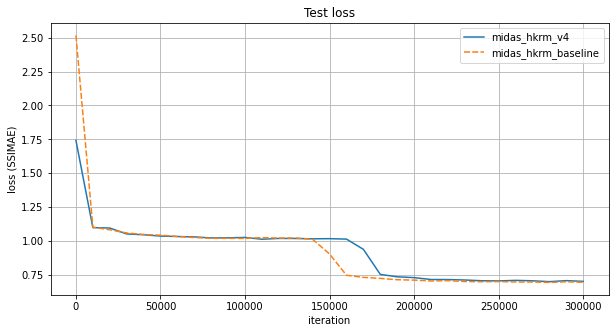

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(10, 5))
plt.grid(True)
sns.lineplot(data=test_losses)
plt.title("Test loss")
plt.xlabel("iteration")
plt.ylabel("loss (SSIMAE)")
plt.savefig("test_losses.jpg")